# Module 1 – The Machine Learning Landscape

This material is adapted from the book Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow by Geron Aurelien.



## Datasets

* The book shows how to download and merge two datasets from the OECD website (Better Life Index) and from IMF website (GDP per capita).
    * https://stats.oecd.org/index.aspx?DataSetCode=BLI
    * https://www.imf.org/en/Publications/SPROLLS/world-economic-outlook-databases
    
* Here, we will start with a .csv file that contains country names, GDP per capita, and life satisfaction scores.
* We will load the csv data into a Pandas DataFrame called country_stats

In [1]:
import pandas as pd

country_stats = pd.read_csv("../data/country_stats.csv")

print (country_stats)

            Country  GDP per capita  Life satisfaction
0            Russia        9054.914                6.0
1            Turkey        9437.372                5.6
2           Hungary       12239.894                4.9
3            Poland       12495.334                5.8
4   Slovak Republic       15991.736                6.1
5           Estonia       17288.083                5.6
6            Greece       18064.288                4.8
7          Portugal       19121.592                5.1
8          Slovenia       20732.482                5.7
9             Spain       25864.721                6.5
10            Korea       27195.197                5.8
11            Italy       29866.581                6.0
12            Japan       32485.545                5.9
13           Israel       35343.336                7.4
14      New Zealand       37044.891                7.3
15           France       37675.006                6.5
16          Belgium       40106.632                6.9
17        

## Set up matplotlib

* The next few lines set up matplotlib to make nice looking figures in Jupyter notebook

In [2]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Plot the data
* It is always helpful to look at a plot of the data
* We will use matplotlib's pyplot to get a quick look


* Run the code below and look at the output
    * There appears to be a linear trend (albeit with some noise)

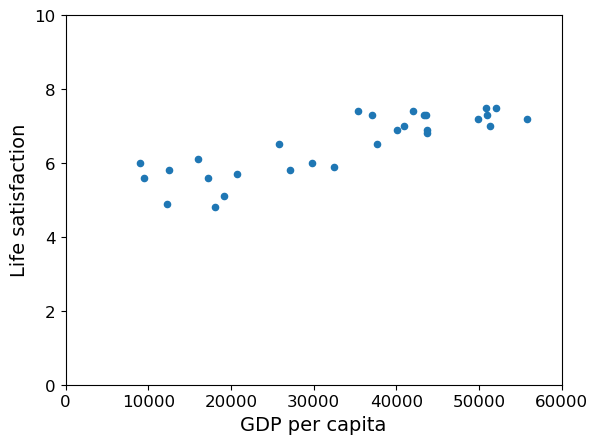

In [3]:
import matplotlib.pyplot as plt

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0,60000,0,10])
plt.show()

## Set up the training data

* For the training data, we do not need the country names
* Instead, we will create two NumPy ndarrays that are positionally aligned
    * Array X will contain the GDP per capita numbers
    * Array y will contain the corresponding life satisfaction scores
    * By convention, we use uppercase-X and lowercase-y


In [4]:
import numpy as np

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# print out the first 5 of each
print(X[:5])
print(y[:5])


[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]]
[[6. ]
 [5.6]
 [4.9]
 [5.8]
 [6.1]]


# Simple linear regression model

* Model selection
    * In this step, we need to decide what type of ML model to try
    * Since the trend appears linear, it makes sense to use scikit-learn's linear_model:  sklearn.linear_model
    * Often, looking at a plot of the data will help reveal characteristics that can inform what model(s) to try

* Simple linear model
    * A simple linear model will find a *line* that best fits the data
    * Remember the equation for a line:  y = mx + b
    * For this example, we can re-write the equation as:
    
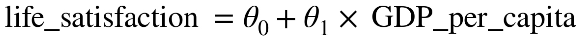


* In the above equation
    * $\theta_{0}$ is the intercept
    * $\theta_{1}$ is the slope
    
* By changing these two parameters (slope and intercept), we can model any linear function

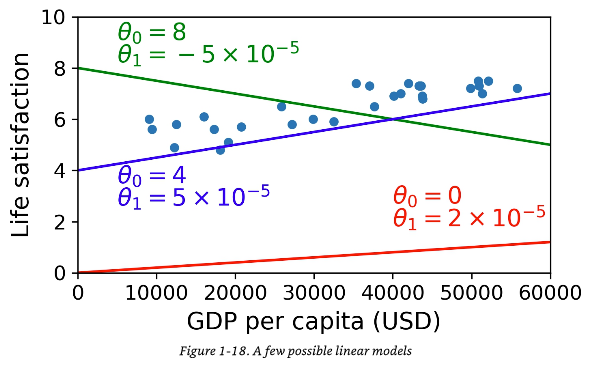


### Training the model
* Using the .fit method, we fit the model to the data.
* This is where the model is trained on the data.
* The "magic" behind the .fit method is the linear regression algorithm
    * It will find the slope and intercept that create the "best fit" line for the input data
    * "Best fit" means that the line minimizes the amount of error across all the data points
        * This is an example of a *cost function*
        * We will look at cost functions in more detail later
    * We will leave the details of how it does this for a future module

In [5]:
# Select a linear regression model
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X,y)


LinearRegression()


* In this case, the algorithm finds the best fit line to our data:
    
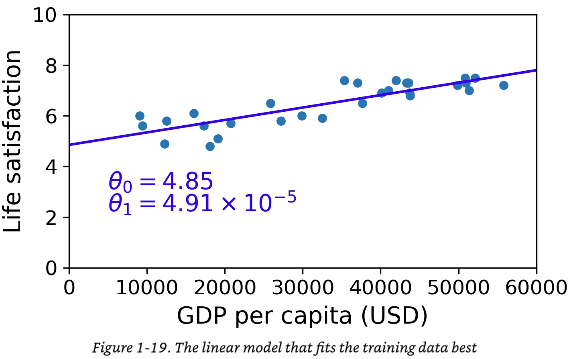


### Use the trained model to make a prediction
* Using the trained model's .predict function, we can predict an output value for an unseen input
* In the case below, we input Cyprus' GDP (22587) and the model predicts a life satisfaction score of 5.9624.


In [6]:
# Make a prediction for Cyprus

X_new = [[22587]]  # Cyprus' GDP per capita

print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


## Change to a k-Nearest Neighbors regression

Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two
lines:

```python
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
```

with these two:

```python
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
```

In [7]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]


[[5.76666667]]


* k-Nearest Neighbors is an instance-based learning algorithm.
* It works by looking at the k-nearest neighbors to the input value.
* In this case, Slovenia (20732) has the closest GDP to Cyprus (22587)
* Slovenia has a life satisfaction of 5.7
* The next two closest in terms of GDP are Portugal (5.1) and Spain (6.5)
* Averaging these three values (5.1, 5.7, 6.5) gives you 5.766

In [9]:
print (country_stats[6:11])
print ()
print (np.mean([5.1, 5.7, 6.5]))

     Country  GDP per capita  Life satisfaction
6     Greece       18064.288                4.8
7   Portugal       19121.592                5.1
8   Slovenia       20732.482                5.7
9      Spain       25864.721                6.5
10     Korea       27195.197                5.8

5.766666666666667


## Summary

* We studied the data

* We selected a model

* We trained the model on training data
    * The learning algorithm searched for model parameters that minimized a cost function

* We used the model to make predictions on new data
    * We hope that the model generalizes to these new cases


_________________________________________

# Exercise M1

* In this exercise, you will have the opportunity to apply concepts covered in this module.

* For the exercise, you will use the OECD BLI data again
* This time, you will use a "wide" version of the BLI dataset located in the file ../data/oecd-bli-wide.csv
* The goal for this exercise is to try to predict the attribute "Personal earnings" (JE_PEARN) based on the attribute "Educational attainment" (ES_EDUA)

### 1. Read in the Exercise M1 dataset

* Write code to read in the data in ../data/oecd-bli-wide.csv into a Pandas DataFrame
* Print out the first few rows of data to make sure the data was read correctly
* Do any data cleaning that is needed to prepare the data for training
    * Note that this may involve dealing with missing values
    * For this exercise, we will keep things simple: you should DROP any rows with missing values.

In [10]:
#Read in the data with a pandas dataframe
country_data = pd.read_csv("../data/oecd-bli-wide.csv")

# print out the first 5 of each
print(country_data[:5])

#drop any rows with missing values
country_data.dropna(inplace=True)


     Country  CG_SENG  CG_VOTO  EQ_AIRP  EQ_WATER  ES_EDUA  ES_EDUEX  ES_STCS  \
0  Australia      2.7     92.0      6.7      92.0     84.0      20.0    499.0   
1    Austria      1.3     76.0     12.2      92.0     86.0      17.0    491.0   
2    Belgium      2.0     88.0     12.8      79.0     80.0      19.0    500.0   
3     Brazil      2.2     80.0     11.7      70.0     57.0      16.0    400.0   
4     Canada      2.9     68.0      7.1      90.0     92.0      17.0    517.0   

   HO_BASE  HO_HISH  ...  JE_EMPL  JE_LMIS  JE_LTUR  JE_PEARN  PS_FSAFEN  \
0      NaN     19.4  ...     73.0      3.1      1.0   55206.0       67.0   
1      0.8     20.8  ...     72.0      2.3      1.3   53132.0       86.0   
2      0.7     20.0  ...     65.0      2.4      2.3   54327.0       56.0   
3      6.7      NaN  ...     57.0      NaN      NaN       NaN       45.0   
4      0.2     22.9  ...     70.0      3.8      0.5   55342.0       78.0   

   PS_REPH  SC_SNTWS  SW_LIFS  WL_EWLH  WL_TNOW  
0     

In [11]:
# print out the first 5 of each
print(country_data[:5])

    Country  CG_SENG  CG_VOTO  EQ_AIRP  EQ_WATER  ES_EDUA  ES_EDUEX  ES_STCS  \
1   Austria      1.3     76.0     12.2      92.0     86.0      17.0    491.0   
2   Belgium      2.0     88.0     12.8      79.0     80.0      19.0    500.0   
4    Canada      2.9     68.0      7.1      90.0     92.0      17.0    517.0   
9   Estonia      2.7     64.0      5.9      86.0     91.0      18.0    526.0   
10  Finland      2.2     69.0      5.5      97.0     91.0      20.0    516.0   

    HO_BASE  HO_HISH  ...  JE_EMPL  JE_LMIS  JE_LTUR  JE_PEARN  PS_FSAFEN  \
1       0.8     20.8  ...     72.0      2.3      1.3   53132.0       86.0   
2       0.7     20.0  ...     65.0      2.4      2.3   54327.0       56.0   
4       0.2     22.9  ...     70.0      3.8      0.5   55342.0       78.0   
9       5.7     17.0  ...     74.0      5.4      1.2   30720.0       79.0   
10      0.4     23.1  ...     72.0      2.2      1.2   46230.0       88.0   

    PS_REPH  SC_SNTWS  SW_LIFS  WL_EWLH  WL_TNOW  
1    

### 2. Create the X and y vectors, plot the data

* Create a column vector named "X" that has the input values (i.e., "Educational attainment")
* Create another vector named "y" that has the output values (i.e., "Personal earnings")
* Create a scatter plot to visualize the data

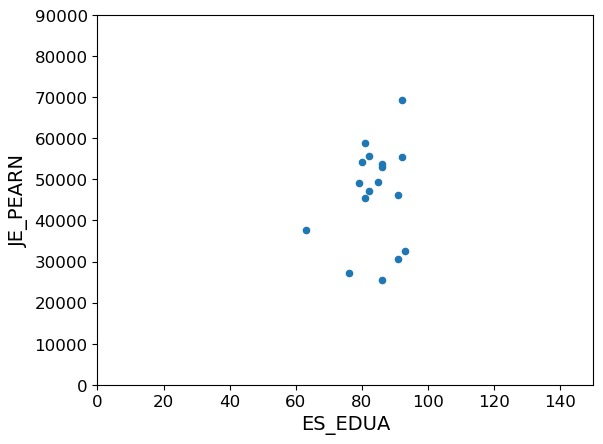

In [20]:
# creating a column vector X with "Educational attainment" values
X = np.c_[country_data["ES_EDUA"]]

# creating a column vector y with "Personal earnings" values
y = np.c_[country_data["JE_PEARN"]]

#creating a scatterplot 
country_data.plot(kind='scatter', x="ES_EDUA", y='JE_PEARN')
plt.axis([0,150,0,90000])   #adjusting the graph scale
plt.show()



### 3. Train a linear regression model, make a prediction

* Train a linear regression model on the data
* Print out the learned model parameters for the intercept and coefficient.
* Use the model to output (print) a prediction for a new (unseen) X value of 81.


In [21]:
# Select a linear regression model
import sklearn.linear_model

model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X,y)

LinearRegression()

In [22]:
# Make a prediction 
X_unseen = [[81]]  

print(model.predict(X_unseen)) 

[[45788.14920844]]


### 4. Answer the following questions

* Do you think a linear model is a good choice for this data?
* Explain why or why not

I don't think that the linear regression model is a good choice for this data because the scatterplot shows the points in a cluster as opposed to a linear trend. If we develop a model that using the y = mx + b format, the output using a new predicted value won't necessarily follow a line trend. When put in a X value of 81, the respective y value is less than the anticipated y value based on the scatterplot. We expect the y value to be closer to 50000.

### 5. Train a 3-Nearest Neighbors regression model, make a predication

* Using the same data, train a 3-Nearest Neighbors regression model
* Use the model to output (print) a predication for an X value of 81.

In [23]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction 
print(model1.predict(X_unseen)) # outputs [[52912.]]


[[52912.]]


### 6. Answer the following questions

* Do you think a 3-Nearest Neighbors model is a good choice for this data?
* Explain why or why not


* Do you think it is better than the linear regression model?
* Explain why or why not


I think that thr 3-Nearest Neighbors model is a good choice for this data. The K-Nearest Neighbors takes the three clostest neighbored to the new data point added and takes the average as the y value. As we see in the scatterplot, the data points are more closely clustered together (therefore more neighboring points). This 3-Nearest Neighbors model is better than the linear regression model in this case because of the shape/distribution of the data. When we tested the 3-Nearest Neighbors model with a new X value, the model gave us a closer prediction for y than the y value provided by the linear regression model. 